## Homoscedasticity

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [4]:

# Load the dataset
wine = load_wine()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Fit a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

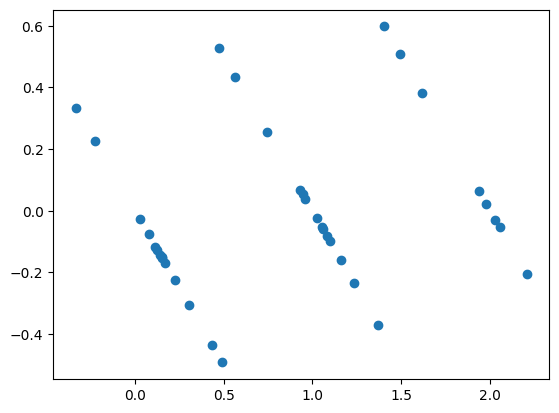

In [6]:

# Plot the residuals vs. fitted values
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values')
plt.show()


* No clear pattern in the plot: If there is a clear pattern (such as a funnel shape or a curve) in the plot, it may indicate heteroscedasticity.
* Constant spread of the residuals: If the spread of the residuals is relatively constant across all levels of fitted values, it indicates homoscedasticity. If the spread of the residuals increases or decreases as the fitted values increase, it may indicate heteroscedasticity.
* No outliers: Outliers in the plot can affect the conclusion about homoscedasticity.

### Bartlett's test using Python

In [7]:
from scipy.stats import bartlett
residuals = y_test - y_pred
bartlett_test = bartlett(residuals, X_test[:,0], X_test[:,1], X_test[:,2], X_test[:,3], X_test[:,4], X_test[:,5], X_test[:,6], X_test[:,7], X_test[:,8], X_test[:,9], X_test[:,10])
print("Bartlett's test p-value:", bartlett_test[1])


Bartlett's test p-value: 7.16434096383359e-284


Bartlett's test: This test assumes normality of the residuals and tests whether the variance of the residuals is equal across all levels of the predictor variable. The null hypothesis is that the variances are equal. If the p-value of the test is greater than a chosen significance level (such as 0.05), then we fail to reject the null hypothesis and conclude that there is homoscedasticity. Otherwise, we reject the null hypothesis and conclude that there is heteroscedasticity.
Here p-value is less than the significance level, so there is no homoscedasticity